# Desarrollo de pipeline semi-automático para estudiar los condicionamientos estructurales en la divergencia secuencial de proteínas

**Autor:** CE Guisande Donadio

## Bloque de Codigo 1.

### Objetivo
* Cargar liberias
* Definir funciones 

In [1]:
#Encabezado del archivo
import os,csv
import pandas as pd
from IPython.display import display, Markdown, Latex
import matplotlib.pyplot as plt
%matplotlib inline

def cargar_txt_en_lista(file_path):
    return_list = []
    with open(file_path,"r") as openfile:
        for lines in openfile:
            return_list.append(lines.replace("\n",""))
            
    return return_list

#Filtros de String para dataframe
#Variante para una columna

def sfilter_by_col(df_query,col_name,text,has=True):
    df_return = df_query.loc[df_query[col_name].str.contains(text)==has]
    return df_return

def sfilter_linage(df_query,text,has=True):
    df_return = df_query.loc[df_query["Linage"].str.contains(text)==has]
    return df_return


def sfilter_org(df_query,text,has=True):
    df_return = df_query.loc[df_query["Organism"].str.contains(text)==has]
    return df_return

def sfilter_by_uniprot(df_query,uniprot_query):
    df_return =  df_query.loc[df_query["UNIPROT_ID"]==uniprot_query]
    return df_return


def get_pdb_list_from_df(df_query,uniprot_query):
    df_return =  df_query.loc[df_query["UNIPROT_ID"]==uniprot_query]
    return_list = filter_by_uniprot(df_proteins_celular,"P04637").iloc[0]["PDB_CHAIN_LIST"]
    return return_list

def printd(text):
    display(Markdown(text))
    return

def strlen(x):
    return str(len(x))

def check_not_None(thing):
    if type(thing) != type (None):
        return True
    else:
        return False
    
def endline ():
    line = "_ _ "*22
    printd("# "+line)
    return



printd("## Informe generado por el *Bloque de Codigo 1.*")
print ("Ya puede correr el siguiente bloque")
endline()

## Informe generado por el *Bloque de Codigo 1.*

Ya puede correr el siguiente bloque


# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

## Bloque de Codigo 2.

### Objetivos:
* Armar un dataframe **(df_work)** con ensembles que:
  * Uniprot SWISSPROT  
  * Tengan más de 5 cadenas en PDB
  * Más de 20 homologos en SWISSPROT

## Informe generado por el Bloque de codigo 2

**Fercha del informe**: 2019-11-01

**Reading swissprot**

Dataframe size: 560459

,UNIPROT_ID,Entry_name,Status,Protein_names,Gene names,Organism,Length,Linage,Sequence,Taxonomic lineage IDs
0,Q0ATK2,ACCD_MARMM,reviewed,Acetyl-coenzyme A carboxylase carboxyl transfe...,accD Mmar10_0089,Maricaulis maris (strain MCS10),311,"cellular organisms, Bacteria, Proteobacteria, ...",MTEKSNGMSWLSKITPPGMSKIFSKRDTPDNLWVKCPVSEEMVFHK...,394221
1,O40976,1A_CMVNT,reviewed,Replication protein 1a [Includes: ATP-dependen...,ORF1a,Cucumber mosaic virus (strain NT9) (CMV),993,"Viruses, Riboviria, Bromoviridae, Cucumovirus,...",MATSSFNINELVASHGDKGLLATALVDKTAHEQLEEQLQHQRRGRK...,117124
2,Q84P24,4CLL6_ARATH,reviewed,4-coumarate--CoA ligase-like 6 (EC 6.2.1.-) (4...,4CLL6 At4g19010 F13C5.180,Arabidopsis thaliana (Mouse-ear cress),566,"cellular organisms, Eukaryota, Viridiplantae, ...",MAATHLHIPPNPKTQTSHQNPPFWFSSKTGIYTSKFPSLHLPVDPN...,3702
3,P62260,1433E_RAT,reviewed,14-3-3 protein epsilon (14-3-3E) (Mitochondria...,Ywhae,Rattus norvegicus (Rat),255,"cellular organisms, Eukaryota, Opisthokonta, M...",MDDREDLVYQAKLAEQAERYDEMVESMKKVAGMDVELTVEERNLLS...,10116
4,P0CK20,A25_VACCC,reviewed,Protein A2.5,A2.5L,Vaccinia virus (strain Copenhagen) (VACV),76,"Viruses, Poxviridae, Chordopoxvirinae, Orthopo...",MSWYEKYNIVLNPPKRCSSACADNLTTILAEDGNHIRAILYSQPKK...,10249


**Reading PDBSWS**

swslist dataframe size: 47097

,UNIPROT_ID,PDB_CHAIN_LIST,pdb_chain_count
0,A0A010,"[5B00_A, 5B00_B, 5B00_C, 5B01_A, 5B01_B, 5B01_...",57
1,A0A011,"[3VK5_A, 3VK5_B, 3VKA_A, 3VKA_B, 3VKB_A, 3VKB_...",10
2,A0A585,[4MNQ_E],1
3,A0A5A3,"[4UDT_B, 4UDU_B]",2
4,A0A5B3,"[5NHT_B, 5NQK_B]",2


**Merge Sprot with SWS**

Dataframe size: 26550

,Length,Taxonomic lineage IDs,pdb_chain_count
count,26550.000000,2.655000e+04,26550.000000
mean,454.547081,1.216896e+05,10.030245
std,545.239279,1.946628e+05,30.223010
min,5.000000,1.700000e+01,1.000000
25%,188.000000,9.606000e+03,2.000000
50%,328.000000,1.009000e+04,4.000000
75%,529.000000,2.089640e+05,8.000000
max,34350.000000,2.510777e+06,1084.000000


### Resumen de informacion del conjunto de proteinas a estudiar

Viruses Dataframe size: 567

Celular Dataframe size: 10165

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Bacteria dataframe size: 3694

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Archaea dataframe size: 418

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Eukaryota dataframe size: 6053

### Graficos del dataframe de trabajo( Organismos Celulares)

**Histograma de Length menores a 3000**

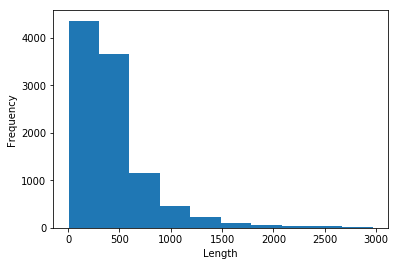

**Histograma de pdb_chain_count menores a 200**

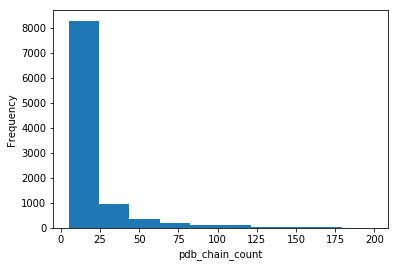

**Se guardo el archivo:** archivos_importantes/df_work_2019-11-01.tsv

Informe generado en 9.593984365463257

Ya puede correr el siguiente bloque.

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

In [2]:
import time,datetime
# MAIN/CARGA DE DATOS
printd("## Informe generado por el Bloque de codigo 2")
printd("**Fercha del informe**: "+str(datetime.date.today()))
tiempo_inicial = time.time()

log_error = dict()
log_error["SWISPROT"] = list()
log_error["PDBSWS_PDBUNIPROT"] = list()

# paths de archivos iniciales
path_swissprot_tab =  "bases_de_datos_ref/uniprot-reviewed_20190730.tab"
path_pdbwsw_pdbchain = "bases_de_datos_ref/pdb_uniprot_chain_map.lst.2"


#CARGAR SWISSPROT
printd ("**Reading swissprot**")

df_sprot = pd.read_csv(path_swissprot_tab,sep="\t")
df_sprot.columns = ['UNIPROT_ID', 
                    'Entry_name', 
                    'Status', 
                    'Protein_names', 
                    'Gene names', 
                    'Organism', 
                    'Length', 'Linage', 
                    'Sequence', 
                    'Taxonomic lineage IDs']
printd("Dataframe size: "+strlen(df_sprot))
display(df_sprot.head(n=5))


#ESTE BLOQUE SIRVE PARA CARGAR SIFTS, 
#actualmente no esta en uso
#
"""
printd ("## Reading sitfs")
df_sifts = pd.read_csv("bases_de_datos_ref/sifts_uniprot_pdb.tsv",header=1,sep="\t")
df_sifts.columns = ["UNIPROT_ID","PDB_list_sifts"]
printd("Dataframe size: "+strlen(df_sifts))
display(df_sifts.head(n=5))

printd ("Merge sprot with sifts")
df_sprot_pdb = pd.merge(df_sprot,df_sifts,on=["UNIPROT_ID"],how="inner")
printd("Dataframe size: "+strlen(df_sprot_pdb))
display(df_sprot_pdb.head(n=1))
"""

###CARGAR PDBSWS
printd ("**Reading PDBSWS**")
#Esto carga la lista manualmente por que algunos codigos uniprot no figuran.
#son listas de ancho fijo (ej: '101m A P02185')
#algunas lineas del archivo 
lst_pdbsws = []
tmp_pdbsws = cargar_txt_en_lista(path_pdbwsw_pdbchain)
for index,line in enumerate(tmp_pdbsws):
    if (line[-1] != "?") and (line[-1] != " "):
        pdb_chain_id = line[0:4].upper()+"_"+line[5] 
        tmp = [pdb_chain_id,line[0:4],line[5],line[7:]]
        lst_pdbsws.append(tmp)
    else:
        #Los errores de carga de archivos se anexan a su log
        message = "Error in line "+ str(index) + ": "+ (line) 
        log_error["PDBSWS_PDBUNIPROT"].append(message)
#Borrar vbariables
del pdb_chain_id
del tmp_pdbsws
del tmp
#Crea el dataframe usando la lista
df_pdbsws = pd.DataFrame(lst_pdbsws).dropna()
df_pdbsws.columns = ["PDB_CHAIN_ID","PDB","CHAIN","UNIPROT_ID"]
#Los agrupa por pdb
df_swslist = df_pdbsws.groupby(["UNIPROT_ID"],as_index=False).agg({'PDB_CHAIN_ID':lambda x:list(x)})
#Agrega el numero de pdbs en la lista
df_swslist["pdb_chain_count"] = df_swslist.apply({"PDB_CHAIN_ID":lambda x: len(x)})
df_swslist.columns= ["UNIPROT_ID","PDB_CHAIN_LIST" ,"pdb_chain_count"]
#Informe visible
printd ("swslist dataframe size: "+strlen(df_swslist))
display(df_swslist.head())

### MERGE: AGREGA las columnas de sws a sprot, elimina los uniprot que no tengan mapeo.
printd ("**Merge Sprot with SWS**")
df_sprot_pdb = pd.merge(df_sprot,df_swslist,on=["UNIPROT_ID"],how="inner")
printd("Dataframe size: "+strlen(df_sprot_pdb))
display(df_sprot_pdb.describe())

### FILTRANDO
# De las proteinas con mas de 5 cadenas, 
# Separar los virus en una tabla aparte.
df_work = df_sprot_pdb.loc[(df_sprot_pdb["pdb_chain_count"]>4) & (df_sprot_pdb["Linage"].str.contains("Viruses")==False)]
df_virus = df_sprot_pdb.loc[(df_sprot_pdb["pdb_chain_count"]>4) & (df_sprot_pdb["Linage"].str.contains("Viruses"))]
printd ("### Resumen de informacion del conjunto de proteinas a estudiar")
printd ("Viruses Dataframe size: "+strlen(df_virus) )
printd ("Celular Dataframe size: "+strlen(df_work))
for taxa in ["Bacteria","Archaea","Eukaryota"]:
    printd ("&nbsp;"*6+taxa+" dataframe size: "+strlen (sfilter_linage(df_work,taxa)))

printd("### Graficos del dataframe de trabajo( Organismos Celulares)")

printd("**Histograma de Length menores a 3000**")
plot_his1 = df_work["Length"].loc[df_work["Length"]<3000].plot(kind="hist")
plot_his1.set_xlabel("Length")
plt.show()


printd("**Histograma de pdb_chain_count menores a 200**")
plot_his2 = df_work["pdb_chain_count"].loc[df_work["pdb_chain_count"]<200].plot(kind="hist")
plot_his2.set_xlabel("pdb_chain_count")
plt.show()




#Esta linea guarda el df_work en un archivo tsv
df_work_path = ("archivos_importantes/df_work_"+str(datetime.date.today())+".tsv")
df_work.to_csv(df_work_path,sep="\t")
printd ("**Se guardo el archivo:** "+ df_work_path)
printd( "Informe generado en "+str(time.time()-tiempo_inicial))
printd ("Ya puede correr el siguiente bloque.")
endline()

## Bloque de Codigo 3


### Objetivos:
* Definir funciones para:
  * correr blast sobre swiwssprot
  * correr cd-hit a 0.95
  * parsear esos resultados y cargarlos en la  *variable global* **ensemeble_data**
 

In [123]:
#Crea un diciconario para acumular los datos a usar
#crea un diccionario que contiene dataframes especificos utiles
#las llaves son los uniprot_id.

def sort_cdhitcluster(list_query):
    return sorted(list_query,key = lambda x: x[2],reverse=True)

def dibujar_histograma(df_query,col):
    plot_his1 = df_query[col].plot(kind="hist")
    plot_his1.set_xlabel(col)
    plt.show()
    return

def show_ensemble_info(query):
    printd("### Mostrando datos de la proteina de estudio")
    for entry in ensemble_data[query]:
        if "sorted" in entry:
            histo = [len(ensemble_data[query][entry][x]) for x in range(30,91,10)]
            printd ("&nbsp;&nbsp;**"+entry+"** >"+ "`"+str(histo)+"`")
        else:
            printd ("&nbsp;&nbsp;**"+entry+"** >"+ "`"+str(ensemble_data[query][entry])+"`")
    return

def run_blast(fasta_file):
    output_filename = fasta_file.replace("fasta/","blast_results/").replace(".fasta","_blast_results.txt")
    cmd = "blastp -query "+ fasta_file +" -db uniprot_sprot.db -evalue 1e-10 -out "+ output_filename +" -outfmt '6 qaccver qlen qstart qend sseqid saccver slen sstart send length staxid nident gaps evalue pident qcovs' -num_alignments 1000"
    os.system(cmd)
    return output_filename


#el imput es el fasta con los homologos, el coef tiene que ser un string.
def cdhit_stuff(filename_hsf,coef):
    outfile_cdhit =  filename_hsf.replace("fasta/homologs_sprot/","cd-hit-results-"+coef+"/").replace("_homologs_sprot.fasta","_cd-hit")
    
    #si el archivo no existe, corre el cdhit
    if not os.path.isfile(outfile_cdhit):
        cmd = "cd-hit -i " + filename_hsf + " -o " + outfile_cdhit + " -c "+coef
        os.system(cmd)
        
    outfile_cdhit = outfile_cdhit+".clstr"
    #parsea los resultados del cdhit
    clusters = dict()    
    if os.path.isfile(outfile_cdhit):
        with open(outfile_cdhit,"r") as openfile:
            for line in openfile:
                text = line.replace("\n","")
                if text[0] == ">":
                    clus_num = (text[1:])
                    clusters[clus_num] = list()
                if text[0] in [str(x) for x in range(0,10)]:
                    uniprot_id =  (text.split(">")[1][0:6])
                    rep = int ("*" in text.split(">")[1])
                    if rep == False:
                        at_percent = float(text.split("at ")[1].replace("%",""))
                    else:
                        at_percent = float("100.00")
                    clusters[clus_num].append( [uniprot_id,bool(rep),at_percent])
        for cluster_n in clusters:
            clusters[cluster_n] = sort_cdhitcluster(clusters[cluster_n])
        return outfile_cdhit,clusters
    else:
        return "N/A","N/A"

def make_fasta_from_list(query,query_list,outfilename):
    with open(outfilename,"w") as openfile:
            openfile.write(">"+query)
            openfile.write("\n")
            openfile.write(ensemble_data[query]["Sequence"])
            openfile.write("\n")
            for uniprot_id in query_list:
                #Si la secuencia esta en el dataframe de sprot
                if len(df_sprot.loc[df_sprot["UNIPROT_ID"]==uniprot_id])>0:
                    seq = df_sprot.loc[df_sprot["UNIPROT_ID"]==uniprot_id]["Sequence"].iloc[0]
                    openfile.write(">"+uniprot_id)
                    openfile.write("\n")
                    openfile.write(seq)
                    openfile.write("\n")
    return outfilename


def get_cdhit_rep(uniprot_query,coef="0.95"):
    cluster_rep_list = []
    for cluster in ensemble_data[uniprot_query]["cd-hit-results-"+coef+"_parsed"]:
        for members in ensemble_data[uniprot_query]["cd-hit-results-"+coef+"_parsed"][cluster]:
            if members[1] == True:
                uniprot_id = members[0]
                df1 = ensemble_df[uniprot_query]["blast_results"]
                if len(df1.loc[df1["UNIPROT_ID"]==uniprot_id]["pident"] ) != 0:
                    ident_val = max(df1.loc[df1["UNIPROT_ID"]==uniprot_id]["pident"])
                    cluster_rep_list.append((members[0],ident_val))
                else:
                    ident_val = 0
                    cluster_rep_list.append((members[0],ident_val))
    return cluster_rep_list    

def histo_dic_cdhit(uniprot_id,coef="0.95"):
    bins =  [30,40,50,60,70,80,90]
    histo_dict = dict()
    for n in bins:
        histo_dict[n] = list()

    for id_and_ident in sorted (get_cdhit_rep(uniprot_id,coef),key = lambda x: x[1]):
        for n in bins:
            if (id_and_ident[1] >= n) and (id_and_ident[1]) < n+10:
                histo_dict[n].append(id_and_ident)
                break
    return histo_dict


ensemble_data = dict()
ensemble_df = dict()
#esta es la funcion importante
def estudiar_proteina(query,show=True,force=False):
    #Check que el query sea correcto
    if not query in list(df_work["UNIPROT_ID"]):
        print ("La proteina solicitada no se encuentra en df_work.")
        return False
    
    #premite la escritura en las variables globales
    global ensemble_data
    global ensemble_df
    
    if check_not_None(ensemble_data.get(uniprot_id)):
        if force==False:
            if show:
                show_ensemble_info(query)
            return True
            
    #carga informacion en ensemble_data y ensemble_df
    ensemble_df[query] = dict()
    ensemble_data[query] = dict(sfilter_by_uniprot(df_work,query).iloc[0])
    #da una lista 
    ensemble_data[query]["PDB_in_df_work"] = (list(set([x[0:4] for x in ensemble_data[query]["PDB_CHAIN_LIST"]])))

    #create fasta file with query seq
    with open ("fasta/"+query+".fasta","w") as openfile:
        openfile.write (">"+query+"\n")
        openfile.write (ensemble_data[query]["Sequence"]+"\n")
    
    #BUSCAR RESULTADOS DEL BLAST, SI NO EXISTEN, CORRERLO
    blast_results_filename = "blast_results/"+query+"_blast_results.txt"
    if os.path.isfile(blast_results_filename):
        if os.path.getsize(blast_results_filename) == 0:
            if show: print ("R ",end="")
            os.system("rm "+blast_results_filename)
            ensemble_data[query]["blast_results"] = run_blast("fasta/"+query+".fasta")
        else:
            ensemble_data[query]["blast_results"] = blast_results_filename
    else:
        ensemble_data[query]["blast_results"] = run_blast("fasta/"+query+".fasta")
    
    
    #PARSEAR LOS RESULTADOS EL BLAST y cargarlos a ensemble data
    if os.path.getsize(ensemble_data[query]["blast_results"]) > 0:
        #leer los datos importantes del blast y colocarlos en un dataframe
        df1 = pd.read_csv(ensemble_data[query]["blast_results"],header=None,sep="\t")
        df1.columns = "qaccver qlen qstart qend sseqid saccver slen sstart send length staxid nident gaps evalue pident qcov".split(" ")
        df1["UNIPROT_ID"] =  df1["sseqid"].str.split("|",expand=True)[1]
        #se agregan los valores de qstart y qend
        df2 = df1[["UNIPROT_ID","pident","qcov","qstart","qend","sstart","send","gaps"]].loc[(df1["UNIPROT_ID"]!=query) & (df1["pident"]>30) & (df1["qcov"]>75) ]
        
        #esta linea elimina los resultados repetidos en el blast y se queda solo con el primer hit.
        ensemble_df[query]["blast_results"] = df2.drop_duplicates(["UNIPROT_ID"])
        del df1,df2
        #carga la infomacion de los homologos al ensemble_data
        ensemble_data[query]["homologs_sprot"] = list(set(list(ensemble_df[query]["blast_results"]["UNIPROT_ID"])))
        ensemble_data[query]["homologs_in_df_work"] = list(set(df_work["UNIPROT_ID"]) & set(ensemble_data[query]["homologs_sprot"]))
    else:
        ensemble_data[query]["homologs_sprot"] = []
        if show: printd("## Alerta, blast_results still 0 "+query)    

        return False
    
    ####### SI tiene menos de 20 homologos NO SIGUE.
    if len( ensemble_data[query]["homologs_sprot"])< 20:
        return False
    
    #CREAR FASTA DE HOMOLOGOS
    filename_hsf = "fasta/homologs_sprot/"+query+"_homologs_sprot.fasta"
    if os.path.isfile(filename_hsf):
        ensemble_data[query]["homologos_sprot_fasta"] = filename_hsf
    else:
        with open(filename_hsf,"w") as openfile:
            openfile.write(">"+query)
            openfile.write("\n")
            openfile.write(ensemble_data[query]["Sequence"])
            openfile.write("\n")
            for homolog in ensemble_data[query]["homologs_sprot"]:
                #Si la secuencia esta en el dataframe de sprot
                if len(df_sprot.loc[df_sprot["UNIPROT_ID"]==homolog])>0:
                    seq = df_sprot.loc[df_sprot["UNIPROT_ID"]==homolog]["Sequence"].iloc[0]
                    openfile.write(">"+homolog)
                    openfile.write("\n")
                    openfile.write(seq)
                    openfile.write("\n")
            ensemble_data[uniprot_id]["homologos_sprot_fasta"] = filename_hsf
    
    #corre el cdhit si el archivo de salida no existe. 
    
    cdhit_results,cdhit_parsed = cdhit_stuff(filename_hsf,"0.95")
    ensemble_data[query]["cd-hit-results-0.95"] = cdhit_results
    ensemble_data[query]["cd-hit-results-0.95_parsed"] = cdhit_parsed
    ensemble_data[query]["cd-hit-sorted-0.95"] = histo_dic_cdhit(query,"0.95")
    
    #Estas lineas hacian el codigo extremadamente lento de decide hacerlo on-demand
    #ensemble_data[query]["cd-hit-results-0.95_fasta"] = make_fasta_from_list(query,[x[0] for x in get_cdhit_rep(query,"0.95")],"fasta/cdhit-0.95/"+query+"_cdhit-0.95.fasta")
    
    cdhit_results,cdhit_parsed = cdhit_stuff(filename_hsf,"0.80")
    ensemble_data[query]["cd-hit-results-0.80"] = cdhit_results
    ensemble_data[query]["cd-hit-results-0.80_parsed"] = cdhit_parsed
    ensemble_data[query]["cd-hit-sorted-0.80"] = histo_dic_cdhit(query,"0.80")
    
    
    #ensemble_data[query]["cd-hit-results-0.80_fasta"] = make_fasta_from_list(query,[x[0] for x in get_cdhit_rep(query,"0.80")],"fasta/cdhit-0.80/"+query+"_cdhit-0.80.fasta")
    
    #muestra los resutaldos hasta el momento
    if show:
        show_ensemble_info(query)
    return True

printd ("## Informe generado por el Bloque de codigo 3")
print (" ")
#Checkquer estructura de carpetas
folder_list = ["ent_files",
               "fasta",
               "blast",
               "pdb_chains",
               "cd-hit-results-0.95",
               "cd-hit-results-0.80",
               "tree"]

printd ("Verificando la estructura de carpetas.")
for folder in folder_list:
    if not os.path.isdir(folder):
        print ("* Creating folder "+ folder)
        os.mkdir(folder)
printd("Ya puede correr el siguiente bloque.")
endline()

## Informe generado por el Bloque de codigo 3

Verificando la estructura de carpetas.

Ya puede correr el siguiente bloque.

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

## Bloque de Codigo 4

### Objetivos:
* Correr **estudiar_proteina(`uniprot_id`)** sobre df_work
* guardar en `list_under_20` aquellas proteinas que no tienen más de 20 homologos sprot.
* Guardar `ensemble_data` en un archivo csv

In [124]:
# Esta ejecuta la funcion estudiar_protina sobre la lista del df_work
# Solo son aceptadas aquellas que tengan <20 homologos sprot

#Solo funciona si es la unica funcio que imprime a lo largo de todo el loop sobre i
def print_progreso(i,total):
    percent = int(index/how_many*10000)/100
    print ("Completed:",index,"of",how_many,"| " + str(percent) +"%  ",end="\r")
    return

printd ("### Informe generado por Bloque de Codigo 4")

ed_filename = "archivos_importantes/ensemble_data_201911011659.csv"

#Si existe la version declarada arriba, lee los datos de ahi"
if os.path.isfile(ed_filename):
    printd ("El archivo existe")
    printd ("Cargando: `"+ed_filename+"`")
    df_reload = pd.read_csv(ed_filename)

    printd ("Ensemble data tiene: "+str(len(df_reload))+" lineas.")
    display(df_reload.head(n=2))

    #mete el df_relad en ensemble_data
    for index,uniprot_id  in enumerate(df_reload["UNIPROT_ID"]):
        print (index+1,"of",4060,end="\r")
        ensemble_data[uniprot_id] = dict()
        literal_list = ["PDB_CHAIN_LIST",  
               "PDB_in_df_work",
               "homologs_sprot",
               "homologs_in_df_work",
               "cd-hit-results-0.95_parsed",
               "cd-hit-sorted-0.95",
               "cd-hit-results-0.80_parsed",
               "cd-hit-sorted-0.80"]
        
        for labels in df_reload:
            if labels in literal_list:
                x = ast.literal_eval((df_reload.loc[(df_reload["UNIPROT_ID"]==uniprot_id)][labels].iat[0]))
            else:
                x = df_reload.loc[(df_reload["UNIPROT_ID"]==uniprot_id)][labels].iat[0]
            ensemble_data[uniprot_id][labels] = x
    
    #recalcula la list_under_20 
    list_under_20 = []
    for uniprot_id in list(df_work["UNIPROT_ID"]):
        if not uniprot_id in list(df_reload["UNIPROT_ID"]):
            list_under_20.append(uniprot_id)
    printd ("list_under_20: "+strlen(list_under_20)+" lineas.")
else:
    list_of_under_20  = []
    how_many = len(list(df_work["UNIPROT_ID"]))
    for index,uniprot_id in enumerate(list(df_work["UNIPROT_ID"])):
        run_ok =estudiar_proteina(uniprot_id,False)

        #Indicador de progreso
        if index % 25 == 0:
            print_progreso(index,how_many)
        if run_ok == False:
            list_of_under_20.append(uniprot_id)
            del ensemble_data[uniprot_id]
            #print (uniprot_id + " have been removed under 20 homolog rule")
        else:
            pass
            #print (uniprot_id + " acepted in ensemble_data")

    print ("Completed : 100%.")
    printd ("**Removed under 20 homolog rule:** ")
    printd ("`"+str(list_of_under_20[0:10])+"...`")
    printd ("**list_of_under_20:** ")
    printd ("`"+str(len(list_of_under_20))+"`")

    printd ("**Acepted in enseble data** `"+ str(list(ensemble_data)[0:10])+ "...`")
    printd ("**ensemble_data:** `"+str(len(list(ensemble_data)))+"`")

    timestamp = str(datetime.datetime.now()).replace("-","").replace(":","").replace(" ","")[0:12]
    ed_filename = "archivos_importantes/ensemble_data_" + timestamp +".csv"

    printd ("Guardando  "+ed_filename)
    df_new = pd.DataFrame.from_dict(ensemble_data,orient="index")
    df_new.head()
    df_new.to_csv(ed_filename,header=True,index=False)
    del df_new

printd("Ya puede correr el siguiente bloque.")
endline()


### Informe generado por Bloque de Codigo 4

El archivo existe

Cargando: `archivos_importantes/ensemble_data_201911011659.csv`

Ensemble data tiene: 4640 lineas.

,UNIPROT_ID,Entry_name,Status,Protein_names,Gene names,Organism,Length,Linage,Sequence,Taxonomic lineage IDs,...,blast_results,homologs_sprot,homologs_in_df_work,homologos_sprot_fasta,cd-hit-results-0.95,cd-hit-results-0.95_parsed,cd-hit-sorted-0.95,cd-hit-results-0.80,cd-hit-results-0.80_parsed,cd-hit-sorted-0.80
0,A0QSL8,RPOA_MYCS2,reviewed,DNA-directed RNA polymerase subunit alpha (RNA...,rpoA MSMEG_1524 MSMEI_1488,Mycobacterium smegmatis (strain ATCC 700084 / ...,350,"cellular organisms, Bacteria, Terrabacteria gr...",MLISQRPTLSEETVAENRSRFVIEPLEPGFGYTLGNSLRRTLLSSI...,246196,...,blast_results/A0QSL8_blast_results.txt,"['Q8CX32', 'Q8A4A2', 'B5ZZ57', 'P92429', 'Q81V...","['P0A7Z4', 'Q9Z9H6', 'P9WGZ1', 'P0A7Z6', 'A7ZS...",fasta/homologs_sprot/A0QSL8_homologs_sprot.fasta,cd-hit-results-0.95/A0QSL8_cd-hit.clstr,"{'Cluster 0': [['P60315', True, 100.0]], 'Clus...","{30: [('Q7YJU6', 30.068), ('Q0ZIY7', 30.068), ...",cd-hit-results-0.80/A0QSL8_cd-hit.clstr,"{'Cluster 0': [['P60315', True, 100.0]], 'Clus...","{30: [('A6H5L3', 30.435), ('Q14FC5', 30.508000..."
1,A0R066,ILVE_MYCS2,reviewed,Branched-chain-amino-acid aminotransferase (BC...,ilvE MSMEG_4276 MSMEI_4176,Mycobacterium smegmatis (strain ATCC 700084 / ...,368,"cellular organisms, Bacteria, Terrabacteria gr...",MNSGPLEFTVSANTNPATDAVRESILANPGFGKYYTDHMVSIDYTV...,246196,...,blast_results/A0R066_blast_results.txt,"['O32954', 'P54690', 'A9UZ24', 'K7QKH1', 'P242...","['P0AB80', 'O15382', 'P54687']",fasta/homologs_sprot/A0R066_homologs_sprot.fasta,cd-hit-results-0.95/A0R066_cd-hit.clstr,"{'Cluster 0': [['O14370', True, 100.0]], 'Clus...","{30: [('K0E3V3', 31.288), ('Q58414', 31.399), ...",cd-hit-results-0.80/A0R066_cd-hit.clstr,"{'Cluster 0': [['O14370', True, 100.0]], 'Clus...","{30: [('K0E3V3', 31.288), ('Q58414', 31.399), ..."


list_under_20: 5525 lineas.

Ya puede correr el siguiente bloque.

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

## Bloque de Codidgo 5

### Objetivos
* Hacer un resumen de los datos ya calculados.

In [125]:
import math

#Get the total size of a folder.
def get_size(start_path = '.'):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(start_path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            # skip if it is symbolic link
            if not os.path.islink(fp):
                total_size += os.path.getsize(fp)
    return total_size

#convierte un valor entero en bytes a human 
def bytes2human(size):
    unit = ["","k","M","G","T","P","E","Z"]
    if size > 0:
        order = int(math.log(size,1024))
        if order > (len(unit)-1):
            order = (len(unit)-1)
        size_h = str(int(size/(1024**order)))+"\t"+unit[order]+"b"
    else:
        size_h = "0\t b"
    return size_h


folder_list = ["archivos_importantes",
               "bases_de_datos_ref",
               "fasta",
               "blast_results",
               "cd-hit-results-0.95",
               "cd-hit-results-0.80",
               "tree",
               "ent_files",
               "pdb_chains"]
printd ("## Informe generado por bloque de Codigo 5")
print ("Timestamp: ",str(datetime.datetime.now()))
print ("")

for folder in folder_list:
    if os.path.isdir(folder):
        size =  bytes2human(get_size(folder))
        print (size,folder,sep="\t")
    else:
        print (folder +" is not a folder")    

print ("")

               


endline()

## Informe generado por bloque de Codigo 5

Timestamp:  2019-11-01 21:39:42.731000

496	Mb	archivos_importantes
663	Mb	bases_de_datos_ref
353	Mb	fasta
209	Mb	blast_results
225	Mb	cd-hit-results-0.95
165	Mb	cd-hit-results-0.80
186	Mb	tree
206	Mb	ent_files
187	Mb	pdb_chains



# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

## Bloque de Codigo E1

### Objetivos
* define la fucuncion `seleccionar_para_alinear`
* la aplica sobre los resultados de `ensemble_data[uniprot_id]["cd-hit-sorted-0.95"]` si:
  * antes de seleccionar tiene más de 80 homologos en total
  * la cantidad de bins vacios es menor a 3
  * despues de agregar los homologos de df_work, tiene al menos 70 homologos
* Guarda los resultados en `caped25`

## Informe generado por Bloque de Codigo E1

`caped25_notA_notB` 2996

`caped25_condA_notB `504

`caped25_condA_condB` 1140

,uniprot_id,pdb_chains,len_ali,histogram
0,A0QSL8,8,97,"[25, 25, 17, 2, 13, 6, 2]"
1,A0R3D3,5,76,"[25, 25, 11, 4, 4, 4, 0]"
2,A3M692,124,82,"[0, 25, 25, 25, 0, 1, 0]"
3,A5U4M0,18,74,"[25, 25, 14, 1, 4, 3, 0]"
4,A5U8S7,5,87,"[25, 25, 25, 3, 2, 3, 0]"


**Histograma de pdb_chains <200**

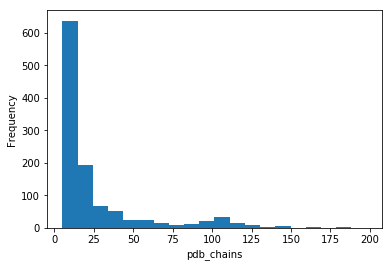

**Histograma de pdb_chains >200**

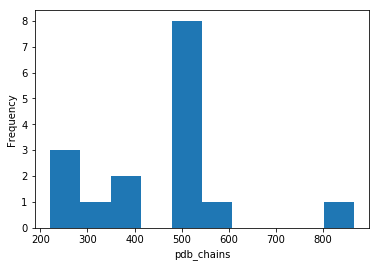

**Histograma de len_ali**

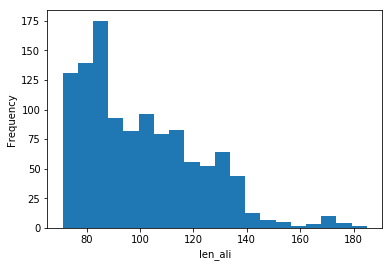

la lista `choped25` se guardo en un `archivos_importantes/choped25.csv`

Ya puede correr el siguiente bloque.

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

In [135]:
#histodict_tuple: diccionario de cohortes, con lista de tuplas ordenadas by [1] (Uniprot_id,%ident)
#homologos_dfwork: una lista con los 
def seleccionar_para_alinear(histodic_tuple,homologos_dfwork,cutoff=25):
    para_alinear = dict()
    for x in range(30,91,10):
        cantidad = len(histodic_tuple[x])
        #basicamente, como cada cohorte esta ordenada por porcentaje de identidad
        # cuando hay muchos trata de cubrir todo el intervalo
        # saltando de a "k" en la iteracion.
        if cantidad > cutoff:
            seleccionados_i = []
            k = cantidad//cutoff 
            if k==0:
                k=1 #el minimo es i
            for i in range(0,cantidad,k):
                seleccionados_i.append (histodic_tuple[x][i][0])

                #para no pasarse, corta si se supera el cutoff
                if len(seleccionados_i) >= cutoff:
                    break
        else:
            #si son menos, los mandamos todos por las dudas
            seleccionados_i =  [x[0] for x in histodic_tuple[x]]

        para_alinear[x] = seleccionados_i

    histo_selec = [len(para_alinear[x]) for x in range (30,91,10)]

    #aca hay que agregar, si no estan los homologos que estan en df_work
    # si bien algunos sean descartados por los filtros, es necesario que esten
    # en los alineamientos para compararlos

    seleccionados_full = []
    for x in range (30,91,10):
        for homolgos in para_alinear[x]:
            seleccionados_full.append(homolgos)
    for ids in homologos_dfwork:
        if not ids in seleccionados_full:
            seleccionados_full.append(ids)
    
    return seleccionados_full,histo_selec


#### FIN DEL AREA DE DEFINICON DE FUNCIONES

printd("## Informe generado por Bloque de Codigo E1")


df1 = pd.DataFrame()

#para ser incluidos, deben tener + de 80 al final
count = 0
caped25_notA = []
caped25_condA_condB = []
caped25_condA_notB = []
to_dataframe = []
for uniprot_id in list(ensemble_data):
    #arma un historgrama de los cluster de ch-hit
    histo = [len(ensemble_data[uniprot_id]["cd-hit-sorted-0.95"][x]) for x in range(30,91,10)]

    #condicion A
    if (sum (histo) > 80 ) and (histo.count(0)<=3):
        cdhit95_histodic = ensemble_data[uniprot_id]["cd-hit-sorted-0.95"]
        homologos_dfwork = ensemble_data[uniprot_id]["homologs_in_df_work"]
        pdb_chains = str(ensemble_data[uniprot_id]["pdb_chain_count"])
        
        
        
        #Aca se usa la funcion para seleccionar las secuencias que van al alineamiento
        seleccionados_full,histo_selec =  seleccionar_para_alinear(cdhit95_histodic,homologos_dfwork,25)
        #condicion_B
        if len(seleccionados_full) > 70:
            # print (uniprot_id,"cdhit",histo,sum(histo),"-","-","-",sep="\t")
            to_dataframe.append ([uniprot_id,int(pdb_chains),len(seleccionados_full),histo_selec]) 
            ensemble_data[uniprot_id]["seleccionados_full"]= seleccionados_full
            count +=1
            caped25_condA_condB.append(uniprot_id)
        else:
            caped25_condA_notB.append(uniprot_id)
    else:
        caped25_notA.append(uniprot_id)

printd ("`caped25_notA_notB` "+strlen(caped25_notA))
printd ("`caped25_condA_notB `"+strlen(caped25_condA_notB))
printd ("`caped25_condA_condB` "+strlen(caped25_condA_condB))
df1 = pd.DataFrame(to_dataframe,columns=["uniprot_id","pdb_chains","len_ali","histogram"])
display(df1.head())

printd("**Histograma de pdb_chains <200**")
plot_his3 = df1["pdb_chains"].loc[df1["pdb_chains"]<200].plot(kind="hist",bins=20)
plot_his3.set_xlabel("pdb_chains")
plt.show()


printd("**Histograma de pdb_chains >200**")
plot_his4 = df1["pdb_chains"].loc[df1["pdb_chains"]>200].plot(kind="hist",bins=10)
plot_his4.set_xlabel("pdb_chains")
plt.show()


printd("**Histograma de len_ali**")
plot_his5 = df1["len_ali"].plot(kind="hist",bins=20)
plot_his5.set_xlabel("len_ali")
plt.show()

printd("la lista `choped25` se guardo en un `archivos_importantes/choped25.csv`")
df1.to_csv("archivos_importantes/choped25.csv",header=True)

printd("Ya puede correr el siguiente bloque.")
endline()

## Bloque de Codigo E2

### Objetivo
* Sobre la lista `caped25_condA_condB`
  * Alinear 
  * Convertir a phy
  * Hacer arbol

In [127]:
# para hacer el archivo fasta 
def make_fasta_from_list(query,query_list,outfilepath):
    #Chequer que el representante este antes de agregarlo
    if not query in query_list:
        query_list = [query]+list(set(query_list))
    with open(outfilepath,"w") as openfile:
        for uniprot_id in query_list:
            #Si la secuencia esta en el dataframe de sprot
            if len(df_sprot.loc[df_sprot["UNIPROT_ID"]==uniprot_id])>0:
                seq = df_sprot.loc[df_sprot["UNIPROT_ID"]==uniprot_id]["Sequence"].iloc[0]
                openfile.write(">"+uniprot_id)
                openfile.write("\n")
                openfile.write(seq)
                openfile.write("\n")
def fasta2phy(inputfilename,outputfilename=""):
    if outputfilename == "":
        outputfilename=inputfilename.replace(".fasta","phy")
    clustal_cmd = 'clustalw "'+inputfilename+'" -convert -output=PHYLIP -outfile="'+outputfilename+'"'
    os.system(clustal_cmd)
    return


#ingresa fasta, sale philp
def alig_fasta(inputfilename,outputfilename=""):
    if outputfilename == "":
        outputfilename=inputfilename.replace(".fasta","phy")
    clustal_cmd = 'clustalw "'+inputfilename+'" -align -convert -output=PHYLIP -outfile="'+outputfilename+'"'
    #print (clustal_cmd)
    os.system(clustal_cmd)
    return

def hacer_arbol(uniprot_id,phy_file,code=""):
    os.chdir(path+"/tree")
    os.system( 'echo "XXXXX\nY" > config'.replace("XXXXX","../"+phy_file) )
    os.system( 'phylip protdist < config') 
    os.system( 'mv outfile XXXXX_protdist_WWWWW'.replace("XXXXX",uniprot_id).replace("WWWWW",code) )
    os.system( 'echo "XXXXX_protdist_WWWWW\nJ\n99\nY" >config'.replace("XXXXX",uniprot_id).replace("WWWWW",code) ) 
    os.system( 'phylip neighbor <config')
    os.system("rm config")
    os.system("mv outfile "+uniprot_id+"_"+code+".outfile")
    os.system("mv outtree "+uniprot_id+"_"+code+".tree")
    os.chdir(path)
    return

printd ("## Informe del bloque de codigo E2")
path = "/home/emanuel/Documents/trabajo_actual/MegaScript/"
caped25 = caped25_condA_condB
for index,uniprot_id in enumerate(caped25):
    fasta_file = "fasta/caped25/"+uniprot_id+"_caped25.fasta"
    ali_phy = "alignments/"+uniprot_id+"_caped25.phy"
    out_tree = uniprot_id+"_caped25.tree"
    
    print (uniprot_id,index,"of",len(caped25),"1) FASTA",end="\r")
    
    if not os.path.isfile(fasta_file):
        make_fasta_from_list(uniprot_id, 
                         ensemble_data[uniprot_id]["seleccionados_full"],
                         path+fasta_file)
    
    
    print (uniprot_id,index,"of",len(caped25),"2) ALING",end="\r")
    if not os.path.isfile(ali_phy):
        alig_fasta(fasta_file,ali_phy)
        
    
    print (uniprot_id,index,"of",len(caped25),"3) TREE ",end="\r")
    if not os.path.isfile("tree/"+out_tree):
        hacer_arbol(uniprot_id,ali_phy,"caped25")
                          
    ensemble_data[uniprot_id]["caped25"] = [fasta_file,ali_phy,"tree/"+out_tree]
    
printd ("Ya puede correr el proximo bloque de codigo")
endline()

## Informe del bloque de codigo E2

Ya puede correr el proximo bloque de codigo

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

## Bloque de Codigo E3

### Objetivo
* Define la funcion choper que permite recortar un alineamiento fasta segun 

In [128]:
from Bio import SeqIO
#hay que darle un fasta alineado, y el nombre de la referencia en el fasta.
#la secuencia de referencia quedara arriba de todo
def choper(ali_filepath, ref,outfile,formato="fasta"):
    ali_homolog = {}
    for record in SeqIO.parse(ali_filepath,formato):
        ali_homolog[record.id] = list(record.seq) #se guarda como lista para poder borrar elementos
    ref_seq = ali_homolog[ref]
    
    #Genera una lista donde se guardan los index que deberian ser borrados
    index_for_removal = []
    for index,aa in enumerate(ref_seq):
        if aa == "-":
            index_for_removal.append(index)
    
    # Como la lista esta en orden creciente, se invierte para ir borrando de atras para adelante
    # y no cambiar el largo de las listas durante la iteracion
    index_for_removal.sort(reverse=True)

    for i in index_for_removal:
        for ids in ali_homolog:
            del ali_homolog[ids][i]
       
    #Esto es para asegurarse que la referencia quede arriba de todo
    ali_choped = {}
    ali_choped[ref] = ali_homolog[ref]
    del ali_homolog[ref]
    ali_choped.update(ali_homolog)
    
    #Esto guarda el archivo con las secuencias chopeadas
    with open(outfile,"w") as savefile:
        for ids in ali_choped:
            seq = ""
            for aa in ali_choped[ids]:
                seq += aa
                ali_choped[ids]=seq
            savefile.write(">"+ids+"\n"+ali_choped[ids]+"\n")
    return ali_choped

printd("## Informe generado por el bloque de codigo E3")

for index,uniprot_id in enumerate(caped25):
    ali_phy = ensemble_data[uniprot_id]["caped25"][1]
    outfile =  "choped/"+uniprot_id+"_ali-caped25-choped.fasta"
    print (index,"of",len(caped25),"   ",end="\r")
    if not os.path.isfile(outfile):
        choper(ali_phy,uniprot_id,outfile,"phylip")
    if not outfile in ensemble_data[uniprot_id]["caped25"]:
        ensemble_data[uniprot_id]["caped25"].append(outfile)
        
printd("Hemos terminiado por hoy")
endline()

## Informe generado por el bloque de codigo E3

Hemos terminiado por hoy

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

# Experimental code, and random filters to data

Este sector esta para experimentar codigos previos a su implementacion y analizar datos en tiempo real.

In [219]:
disprot_list = list()
with open("../disprot/disprot.fasta","r") as openfile:
    for line in openfile:
        if line[0] == ">":
            x = (line.replace("\n","").split("=")[1])
            disprot_list.append(x)
disprot_list.sort()
print ()


joint_set = (set(caped25) & set (disprot_list))             
print ("CAPED",len(set(caped25)))
print ("DISPROT",len(set(disprot_list)))
print ("JOINT:",len(set(joint_set)))
print (joint_set)


CAPED 1140
DISPROT 1388
JOINT: 31
{'Q15418', 'P00760', 'P0A6H5', 'P00441', 'P0A7L8', 'P04695', 'P02699', 'P01112', 'P13551', 'Q88QP8', 'P11021', 'P0A877', 'P41208', 'P06968', 'P0A7K2', 'P04818', 'P38919', 'P60472', 'P0A7S3', 'P0AG63', 'P84051', 'O67086', 'P0A7U3', 'P0CE48', 'P56210', 'P68363', 'P62152', 'Q9RY65', 'P00004', 'P04908', 'P60723'}


## Bloque de Codigo E4



# Apartado para chuspear el dataframe de Virus

In [133]:
df_virus.loc[ (df_virus["Organism"].str.contains("immunodeficiency")) ].head()


,UNIPROT_ID,Entry_name,Status,Protein_names,Gene names,Organism,Length,Linage,Sequence,Taxonomic lineage IDs,PDB_CHAIN_LIST,pdb_chain_count
3018,P04608,TAT_HV1H2,reviewed,Protein Tat (Transactivating regulatory protein),tat,Human immunodeficiency virus type 1 group M su...,86,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MEPVDPRLEPWKHPGSQPKTACTNCYCKKCCFHCQVCFITKALGIS...,11706,"[3MI9_C, 3MIA_C, 4OR5_C, 4OR5_H, 5V61_I]",5
3039,P35963,POL_HV1Y2,reviewed,Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...,gag-pol,Human immunodeficiency virus type 1 group M su...,1435,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MGARASVLSAGELDKWEKIRLRPGGKKQYRLKHIVWASRELERFAV...,362651,"[1K6C_A, 1K6C_B, 1K6P_A, 1K6P_B, 1K6T_A, 1K6T_...",44
3415,P12520,VPR_HV1N5,reviewed,Protein Vpr (R ORF protein) (Viral protein R),vpr,Human immunodeficiency virus type 1 group M su...,96,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MEQAPEDQGPQREPYNEWTLELLEELKSEAVRHFPRIWLHNLGQHI...,11698,"[1BDE_A, 1DSJ_A, 1DSK_A, 1KZS_A, 1KZT_A, 1KZV_...",8
4197,P04586,POL_HV1Z6,reviewed,Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...,gag-pol,Human immunodeficiency virus type 1 group M su...,148,"Viruses, Ortervirales, Retroviridae, Orthoretr...",IPYNPQSQGVVESMNKELKKIIGQVRDQAEHLKTAVQMAVFIHNFK...,11708,"[1IHV_A, 1IHV_B, 1IHW_A, 1IHW_B, 1K6Y_C, 1K6Y_D]",6
4895,P03366,POL_HV1B1,reviewed,Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...,gag-pol,Human immunodeficiency virus type 1 group M su...,1447,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MGARASVLSGGELDRWEKIRLRPGGKKKYKLKHIVWASRELERFAV...,11678,"[1A9M_A, 1A9M_B, 1AJV_A, 1AJV_B, 1AJX_A, 1AJX_...",571


In [29]:
# guardar df en un archivo
df_virus.to_csv("archivos_importantes/df_virus_"+str(datetime.date.today())+".tsv",sep="\t")

In [30]:
len(df_virus)

567